In [6]:
import json
import matplotlib.pyplot as plt
from scipy.stats import iqr
import numpy as np
from matplotlib.ticker import StrMethodFormatter
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

# use LateX fonts
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})



In [2]:
PARTICIPANTS_INFO = {}
x_phq = []
x_phq_male = []
x_phq_female = []

In [3]:


with open('extracted_feature_results/results.json', 'r') as jsonFile:
    PARTICIPANTS_INFO = json.load(jsonFile)
    #print(PARTICIPANTS_INFO)

In [4]:
count_m = 0
count_f = 0
count = 0
for v in PARTICIPANTS_INFO.values():
    count += 1
    x_phq.append(int(v['phq_score']))
    if v['gender'] == 'male':
        x_phq_male.append(int(v['phq_score']))
        count_m += 1
    if v['gender'] == 'female':
        x_phq_female.append(int(v['phq_score']))
        count_f += 1
        
print(count_m)
print(count_f)
print(count)
def get_bins_for_hist(list_phq):
    print("tt", len(list_phq))
    bin_width = (2 * iqr(list_phq)) ** (-1/3) #bin-width based on freedman diaconis rule 
    bins = round((max(list_phq) - min(list_phq)) / bin_width)
    return bins

bins = get_bins_for_hist(x_phq)
bins_male = get_bins_for_hist(x_phq_male)
bins_female = get_bins_for_hist(x_phq_female)

169
105
274
tt 274
tt 169
tt 105


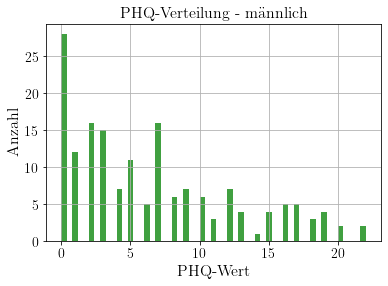

In [18]:
def plot_hist(list_phq, bins, x_label, y_label, plot_title):
    _, _, _ = plt.hist(list_phq, bins, facecolor='g', alpha=0.75)
    
    #plt.xticks(list_phq, weight = 'bold')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlabel(x_label, fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.title(plot_title, fontsize=16)
    plt.grid(True)
    #plt.xticks(range(0, 24))
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.savefig("phq-verteilung-maennlich.svg")
    plt.show()
   


plot_hist(x_phq_male, bins_male, 'PHQ-Wert', 'Anzahl', 'PHQ-Verteilung - männlich')
#x_phq_male.sort()
#plot_hist(x_phq_female, bins_female, 'PHQ-Wert', 'Anzahl', 'PHQ-Verteilung - weiblich')